In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn import linear_model

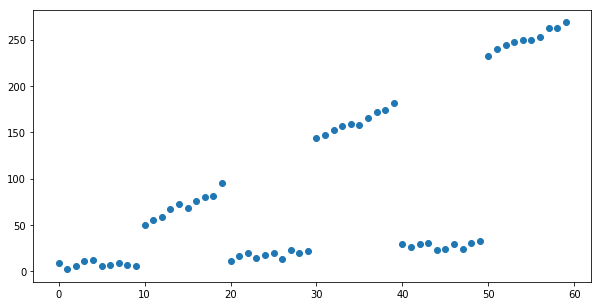

In [3]:
# Mock data
x = np.arange(0, 60)
y = list(map(lambda x: x / 2 + (x // 10) % 2 * 20 * x / 5 + np.random.random() * 10, x))
x = pd.DataFrame({'x': x})
# Plot mock data
plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.show()

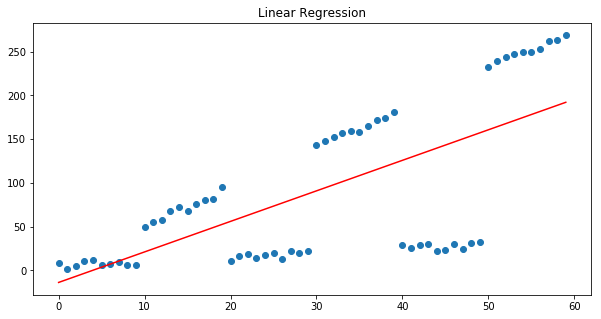

In [4]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(x, y)
plt.figure(figsize=(10, 5))
plt.title("Linear Regression")
plt.scatter(x, y)
plt.plot(x, linear_regressor.predict(x), color='r')
plt.show()

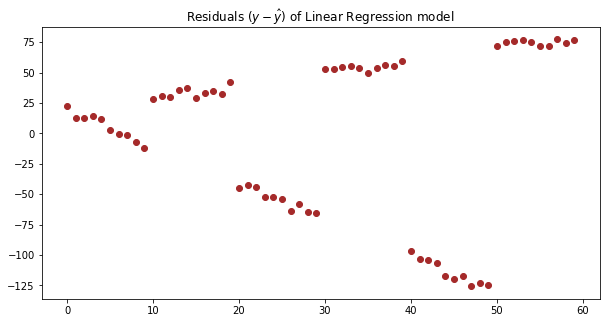

In [5]:
plt.figure(figsize=(10, 5))
plt.title("Residuals $(y - \hat{y})$ of Linear Regression model")
plt.scatter(x, y - linear_regressor.predict(x), color='brown')
plt.show()

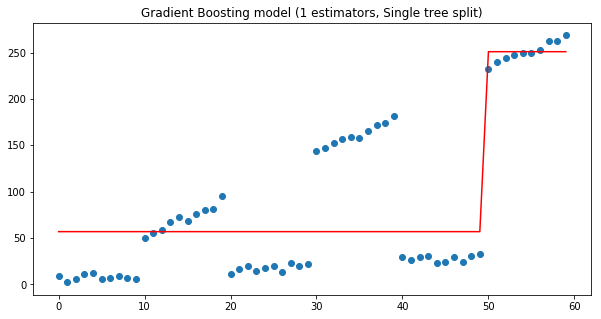

In [6]:
params = {
    'n_estimators': 1,
    'max_depth': 1,
    'learning_rate': 1,
    'criterion': 'mse'
}
gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)
gradient_boosting_regressor.fit(x, y)
plt.figure(figsize=(10, 5))
plt.title('Gradient Boosting model (1 estimators, Single tree split)')
plt.scatter(x, y)
plt.plot(x, gradient_boosting_regressor.predict(x), color='r')
plt.show()

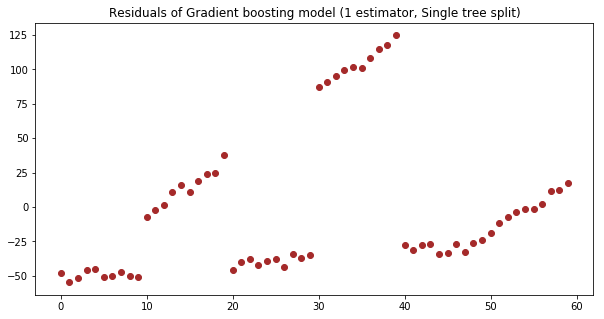

In [7]:
plt.figure(figsize=(10, 5))
plt.title('Residuals of Gradient boosting model (1 estimator, Single tree split)')
plt.scatter(x, y - gradient_boosting_regressor.predict(x), color='brown')
plt.show()

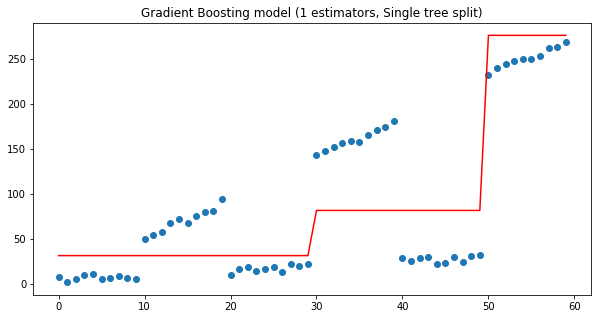

In [8]:
params['n_estimators'] = 2
gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)
gradient_boosting_regressor.fit(x, y)
plt.figure(figsize=(10, 5))
plt.title('Gradient Boosting model (1 estimators, Single tree split)')
plt.scatter(x, y)
plt.plot(x, gradient_boosting_regressor.predict(x), color='r')
plt.show()

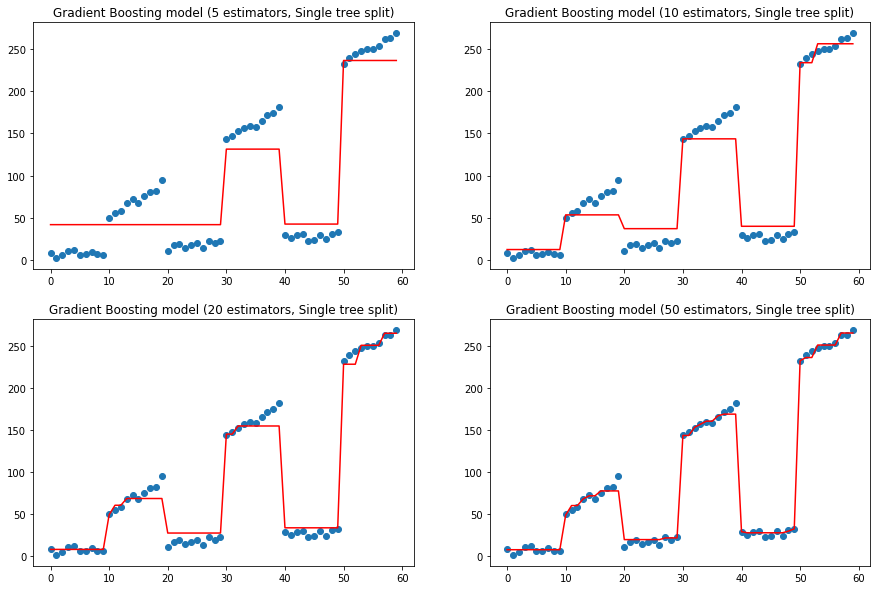

In [9]:
f, ax = plt.subplots(2, 2, figsize=(15, 10))
for idx, n_estimators in enumerate([5, 10, 20, 50]):
    params['n_estimators'] = n_estimators
    gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)
    gradient_boosting_regressor.fit(x, y)
    subplot = ax[idx // 2][idx % 2]
    subplot.set_title('Gradient Boosting model ({} estimators, Single tree split)'.format(n_estimators))
    subplot.scatter(x, y)
    subplot.plot(x, gradient_boosting_regressor.predict(x), color='r')
plt.show()

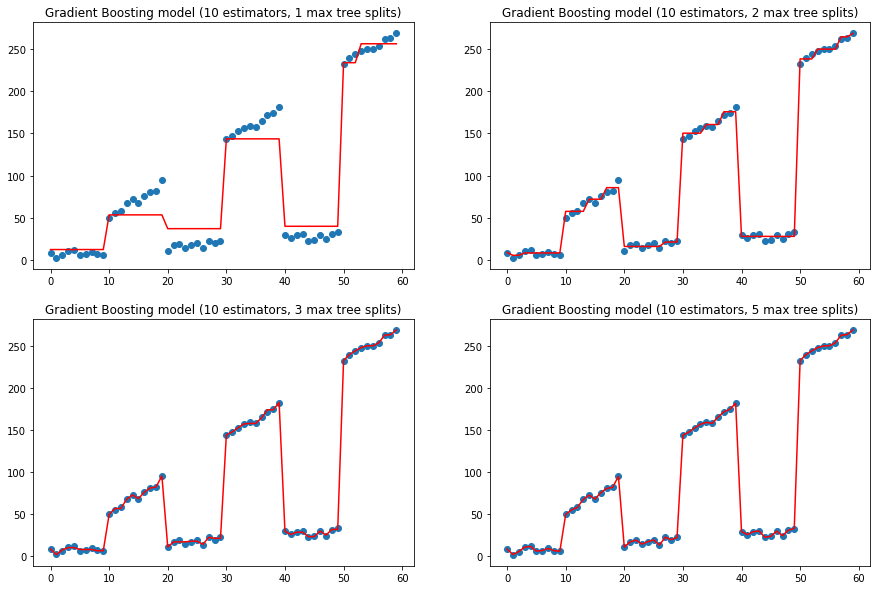

In [10]:
params['n_estimators'] = 10
f, ax = plt.subplots(2, 2, figsize=(15, 10))
for idx, max_depth in enumerate([1, 2, 3, 5]):
    params['max_depth'] = max_depth
    gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)
    gradient_boosting_regressor.fit(x, y)
    subplot = ax[idx // 2][idx % 2]
    subplot.set_title('Gradient Boosting model (10 estimators, {} max tree splits)'.format(max_depth))
    subplot.scatter(x, y)
    subplot.plot(x, gradient_boosting_regressor.predict(x), color='r')
plt.show()